In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pylab
import math

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv(r"newtest.csv")
df.dropna()


data=df[['Ref.L.Cell.Thrp.Kbps.DL(kbit/s)','Ref.Avg.CQI(number)','Ref.DL.PRB.utilization(%)','L.UL.Interference.Avg(dBm)','Ref.L.RA.TA.UE.Index_All_Approx','Ish.L.User.Avg(number)']]
data=data[data.loc[:,"Ref.L.Cell.Thrp.Kbps.DL(kbit/s)"]!=0]
data=data.dropna()

print(data.shape)

data.rename(columns={"Ref.L.Cell.Thrp.Kbps.DL(kbit/s)":"Cell.Thrp.Kbps.DL"},inplace=True)
data.columns=data.columns.astype(str).str.replace("[.]", "_")
data.columns=data.columns.astype(str).str.replace("[(]", "_")
data.columns=data.columns.astype(str).str.replace("[)]", "_")
data.columns=data.columns.astype(str).str.replace("[%]", "X")
print(data.columns)

data.shape
data=data[data.loc[:,"Cell_Thrp_Kbps_DL"]!=0]
data.shape

(5804, 6)
Index(['Cell_Thrp_Kbps_DL', 'Ref_Avg_CQI_number_', 'Ref_DL_PRB_utilization_X_',
       'L_UL_Interference_Avg_dBm_', 'Ref_L_RA_TA_UE_Index_All_Approx',
       'Ish_L_User_Avg_number_'],
      dtype='object')


(5804, 6)

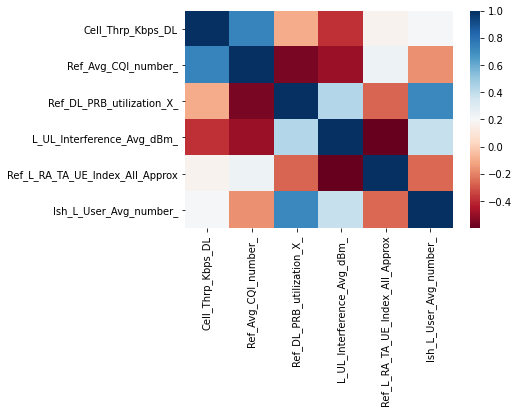

In [ ]:
correlation=data.corr()

sns.heatmap(correlation, xticklabels=correlation.columns,yticklabels=correlation.columns,cmap="RdBu")

In [ ]:
x1=sm.tools.add_constant(data)

series_VIF=pd.Series([variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])], index=x1.columns)
series_VIF

const                              1094.388725
Cell_Thrp_Kbps_DL                     3.425082
Ref_Avg_CQI_number_                   4.692165
Ref_DL_PRB_utilization_X_             3.853931
L_UL_Interference_Avg_dBm_            2.216058
Ref_L_RA_TA_UE_Index_All_Approx       1.568550
Ish_L_User_Avg_number_                2.781518
dtype: float64

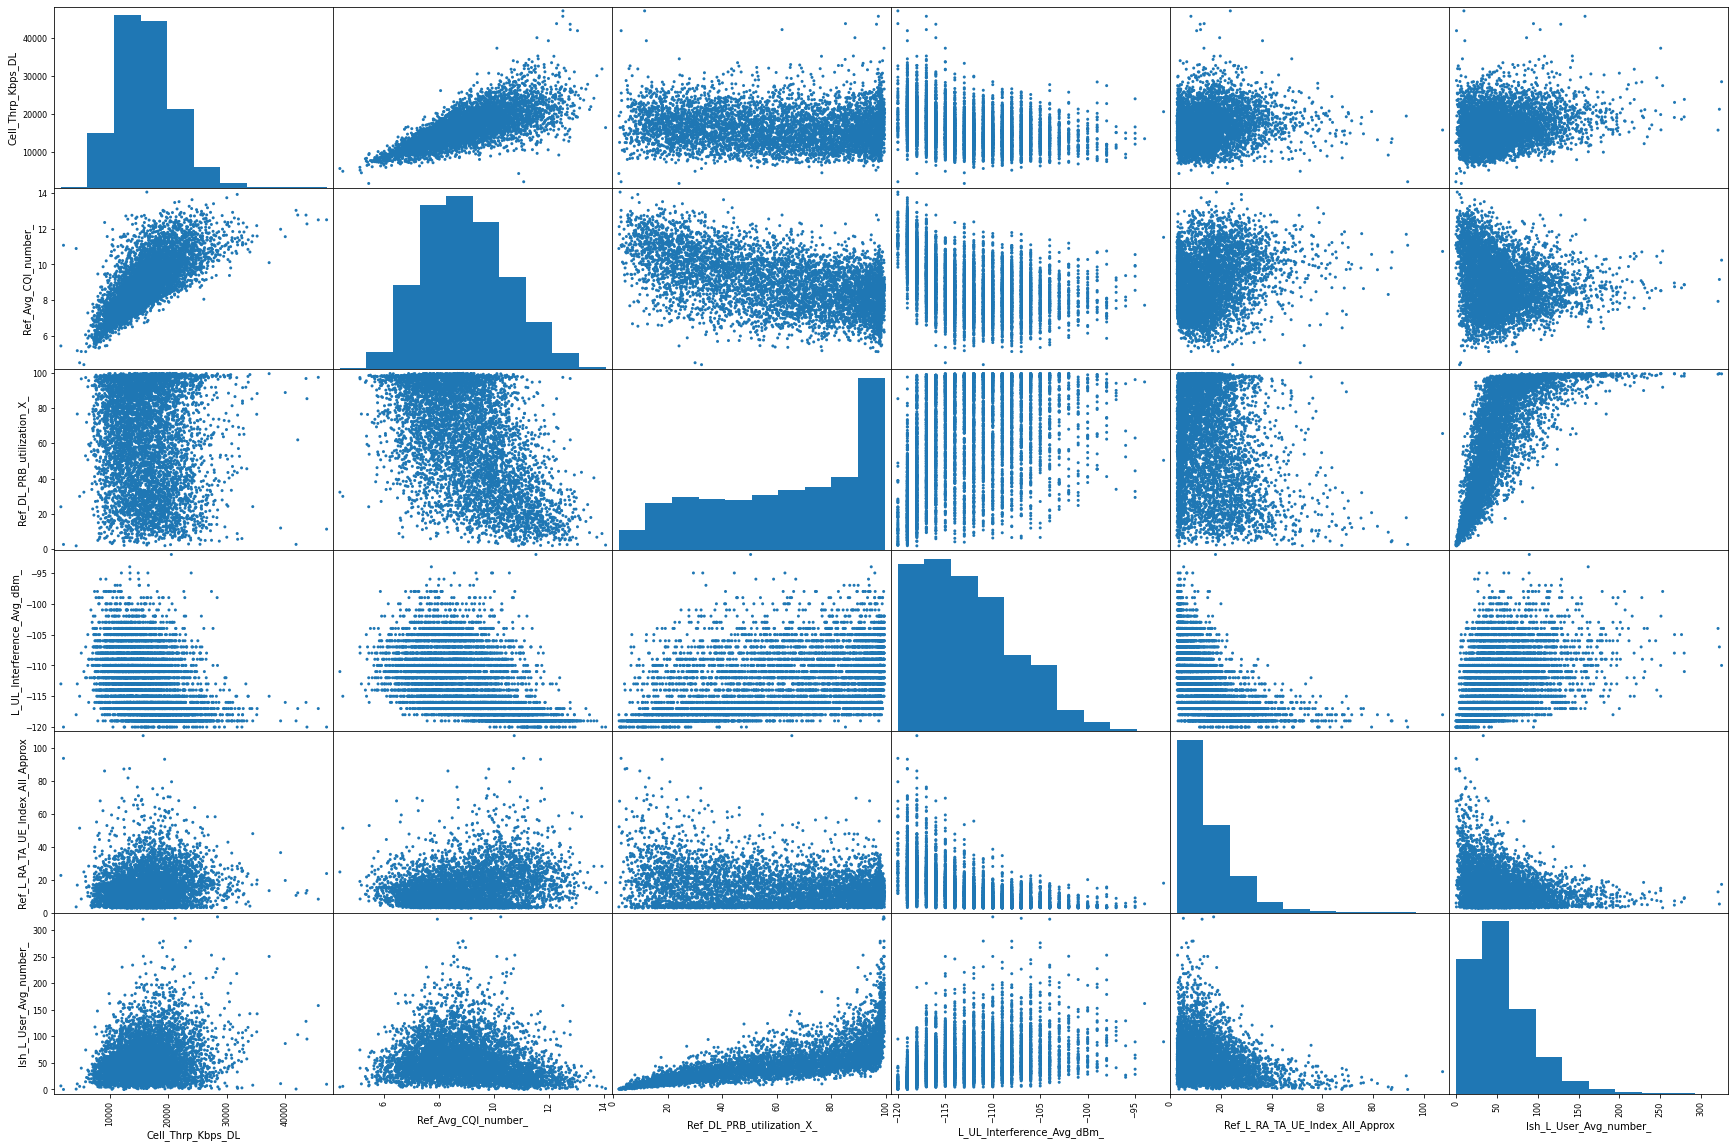

In [ ]:
pd.plotting.scatter_matrix(data, alpha=1, figsize=(30,20))
plt.show()

In [ ]:
#define inputs X and Y

x=data[['Ref_Avg_CQI_number_', 'Ref_DL_PRB_utilization_X_','L_UL_Interference_Avg_dBm_', 'Ref_L_RA_TA_UE_Index_All_Approx','Ish_L_User_Avg_number_']]

y=data[['Cell_Thrp_Kbps_DL']]

# train test split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)

lrModel=LinearRegression()
lrModel.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
intercpt=lrModel.intercept_
coef=lrModel.coef_
print(intercpt, coef, x.columns) # get the intercept and coeffients for the model

[-31402.27260386] [[2767.03825354   56.41466499 -161.60118291   -3.55634181   21.68780984]] Index(['Ref_Avg_CQI_number_', 'Ref_DL_PRB_utilization_X_',
       'L_UL_Interference_Avg_dBm_', 'Ref_L_RA_TA_UE_Index_All_Approx',
       'Ish_L_User_Avg_number_'],
      dtype='object')


In [ ]:
y_predict=lrModel.predict(x_test)

In [ ]:
x2=sm.add_constant(x)
model=sm.OLS(y,x2)
est=model.fit()

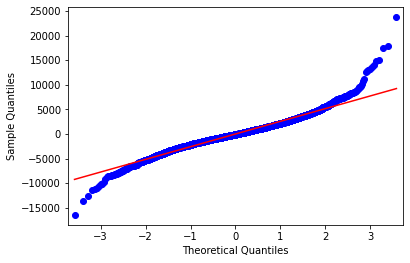

In [ ]:
sm.qqplot(est.resid, line='s') # overfitting / underfitting of model
pylab.show()

In [ ]:
mean_resid=sum(est.resid)/len(est.resid) # it is good that resid around 2,3,4
mean_resid

-2.7261492550333927e-10

In [ ]:
# find the error for the model

model_mse=mean_squared_error(y_test, y_predict)

model_mae=mean_absolute_error(y_test,y_predict)

model_rmse=math.sqrt(model_mse)

print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 5.79e+06
MAE 1.81e+03
RMSE 2.41e+03


In [ ]:
# accuracy of the model
model_r2s=r2_score(y_test,y_predict)
model_r2s

0.7217422640385925